In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Retrieve Data from Database

In [3]:
# Connect SQLite.
dbconn = sqlite3.connect('../data/IowaLiquorSales.db')
cursor = dbconn.cursor()

# Pull Store database.
query = '''SELECT Sales.Date, Sales.ProductID, Sales.StoreID, Store.StoreType, Sales.VolumeSold_Liters, Sales.BottlesSold, Sales.BottleVolume_ml, Price.StateBottleRetail, Sales.Sale_Dollars, Store.County, Store.lat, Store.lng, Product.CategoryGroup
              FROM (((Sales 
              INNER JOIN Product ON Sales.ProductID=Product.ProductID)
              INNER JOIN Store ON Sales.StoreID=Store.StoreID)
              INNER JOIN Price ON Price.ProductID=Sales.ProductID)
              WHERE (Sales.Date BETWEEN '2017-01-01' AND '2021-12-31') 
              AND Sales.Date = Price.Date;'''
cursor.execute(query)
result = cursor.fetchall()
cursor.close()
dbconn.close()

In [4]:
# Put the database in a data frame format.
temp = pd.DataFrame(result, columns = ['Date',
                                       'ProductID',
                                       'StoreID',
                                       'StoreType',
                                       'VolumeSold_Liters', 
                                       'Sale_BottlesSold',
                                       'Sale_BottleVolume_ml',
                                       'Price_StateBottleRetail',
                                       'Sale_Dollars', 
                                       'County',
                                       'lat',
                                       'lng', 
                                       'CategoryGroup'])

In [5]:
temp.head()

,Date,ProductID,StoreID,StoreType,VolumeSold_Liters,Sale_BottlesSold,Sale_BottleVolume_ml,Price_StateBottleRetail,Sale_Dollars,County,lat,lng,CategoryGroup
0,2018-09-04,26826,4617,"Liquor, Spirits & Wine",3.00,4,750.0,23.36,93.44,polk,41.60774,-93.57014,whisky
1,2019-03-19,26826,2513,Food & Grocery,18.00,24,750.0,23.36,560.64,johnson,41.65143,-91.50105,whisky
2,2019-05-15,86251,5068,Convenience,12.00,12,1000.0,3.63,43.56,dickinson,43.36136,-95.13954,liqueur
3,2019-05-16,89566,2588,Food & Grocery,0.75,1,750.0,19.89,19.89,linn,41.97518,-91.60977,tequila
4,2019-05-15,35926,2647,Food & Grocery,9.00,12,750.0,5.06,60.72,linn,41.93023,-91.71520,vodka


In [6]:
temp.shape[0]

12263737

In [7]:
temp['Date'].min()

'2017-01-03'

In [8]:
temp['Date'].max()

'2021-12-31'

In [9]:
temp['Date'] = pd.to_datetime(temp['Date'])
temp['Year'] = pd.to_datetime(temp['Date']).dt.year
temp['Month'] = pd.to_datetime(temp['Date']).dt.month

In [10]:
temp.head()

,Date,ProductID,StoreID,StoreType,VolumeSold_Liters,Sale_BottlesSold,Sale_BottleVolume_ml,Price_StateBottleRetail,Sale_Dollars,County,lat,lng,CategoryGroup,Year,Month
0,2018-09-04,26826,4617,"Liquor, Spirits & Wine",3.00,4,750.0,23.36,93.44,polk,41.60774,-93.57014,whisky,2018,9
1,2019-03-19,26826,2513,Food & Grocery,18.00,24,750.0,23.36,560.64,johnson,41.65143,-91.50105,whisky,2019,3
2,2019-05-15,86251,5068,Convenience,12.00,12,1000.0,3.63,43.56,dickinson,43.36136,-95.13954,liqueur,2019,5
3,2019-05-16,89566,2588,Food & Grocery,0.75,1,750.0,19.89,19.89,linn,41.97518,-91.60977,tequila,2019,5
4,2019-05-15,35926,2647,Food & Grocery,9.00,12,750.0,5.06,60.72,linn,41.93023,-91.71520,vodka,2019,5


# Data Analysis By Year (2017-2021)

### Annual Sales

In [11]:
temp.groupby(['Year']).agg({'Sale_Dollars':'sum'})

,Sale_Dollars
Year,
2017,3.145054e+08
2018,3.342163e+08
2019,3.492202e+08
2020,3.966631e+08
2021,4.281212e+08


### Iowa Population By Year 

In [12]:
county_table = pd.read_csv('../data/county.csv')

In [13]:
county_table.loc[(county_table['Year']==2021)|
                 (county_table['Year']==2020)|
                 (county_table['Year']==2019)|
                 (county_table['Year']==2018)|
                 (county_table['Year']==2017)].groupby(['Year']).agg({'Population':'sum'})

,Population
Year,
2017,3143734
2018,3149900
2019,3159596
2020,3163561
2021,3185239


### Annual Sales per Capita

In [14]:
# Sales per capita
temp.groupby(['Year']).agg({'Sale_Dollars':'sum'})['Sale_Dollars']/[3143734,3149900,3159596,3163561,3185239]

Year
2017    100.041990
2018    106.103775
2019    110.526853
2020    125.385011
2021    134.407884
Name: Sale_Dollars, dtype: float64

### Monthly Sales in 2021

In [15]:
temp[temp['Year']==2021].groupby(['Month']).agg({'Sale_Dollars':'sum'})

,Sale_Dollars
Month,
1,28665135.64
2,29617805.95
3,36653388.86
4,34734584.33
5,33659554.94
6,38890929.25
7,35176467.62
8,36501798.74
9,35837061.02


# I. Data Visualizations - Sales, Volume, Stores (high-level view)

(1000.0, 2050.0)

<Figure size 864x720 with 0 Axes>

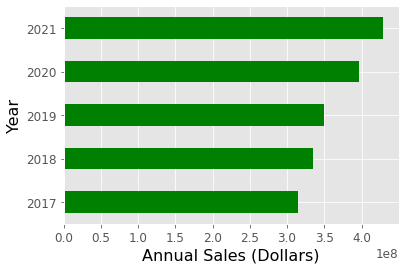

<Figure size 864x720 with 0 Axes>

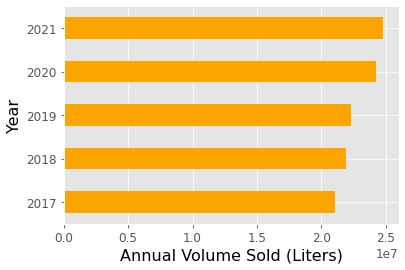

<Figure size 864x720 with 0 Axes>

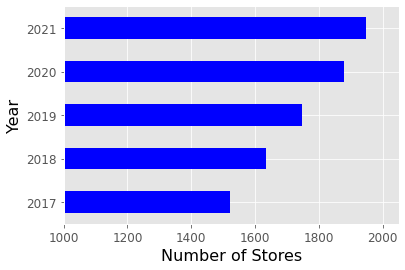

In [16]:
fig = plt.figure(figsize = (12,10))
temp.groupby(['Year']).agg({'Sale_Dollars':'sum'}).plot.barh(color = 'green')
plt.xlabel('Annual Sales (Dollars)',fontsize=16, color = 'black')
plt.ylabel('Year', fontsize=16, color = 'black', rotation = 90)
plt.legend('',frameon=False)

fig = plt.figure(figsize = (12,10))
temp.groupby('Year').agg({'VolumeSold_Liters':'sum'}).plot.barh(color = 'orange')
plt.xlabel('Annual Volume Sold (Liters)',fontsize=16, color = 'black')
plt.ylabel('Year', fontsize=16, color = 'black', rotation = 90)
plt.legend('',frameon=False)

fig = plt.figure(figsize = (12,10))
temp.groupby(['Year']).agg({'StoreID':'nunique'}).plot.barh(color='blue')
plt.xlabel('Number of Stores',fontsize=16, color = 'black')
plt.ylabel('Year', fontsize=16, color = 'black', rotation = 90)
plt.legend('',frameon=False)
plt.xlim(1000,2050)

(0.0, 3000000.0)

<Figure size 864x432 with 0 Axes>

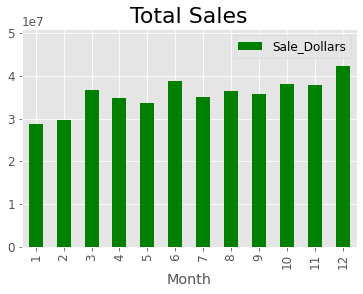

<Figure size 864x432 with 0 Axes>

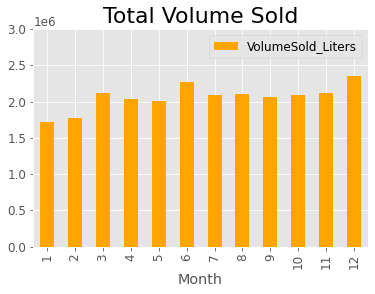

In [17]:
fig = plt.figure(figsize = (12,6))
temp[temp['Year']==2021].groupby(['Month']).agg({'Sale_Dollars':'sum'}).plot.bar(color='green')
plt.title('Total Sales',fontsize=22, color = 'black')
plt.ylim(0,5.1e7)

fig = plt.figure(figsize = (12,6))
temp[temp['Year']==2021].groupby(['Month']).agg({'VolumeSold_Liters':'sum'}).plot.bar(color='orange')
plt.title('Total Volume Sold',fontsize=22, color = 'black')
plt.ylim(0,3e6)

Text(0, 0.5, 'Total Sales')

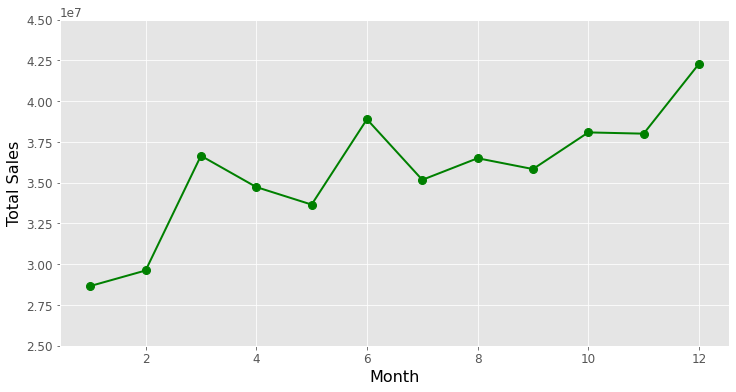

In [18]:
fig = plt.figure(figsize = (12,6))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         temp[temp['Year']==2021].groupby(['Month']).agg({'Sale_Dollars':'sum'}), 
        color='green', marker='o', linewidth=2, markersize=8)
plt.ylim(2.5e7,4.5e7)
plt.xlabel('Month', fontsize=16, color = 'black', rotation = 0)
plt.ylabel('Total Sales', fontsize=16, color = 'black', rotation = 90)

Text(2020.18, 420000000.0, '+8%')

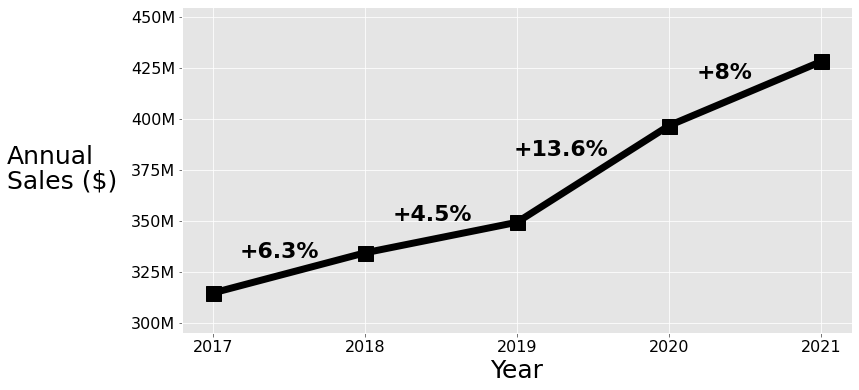

In [53]:
fig = plt.figure(figsize = (12,6))
plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.groupby(['Year']).agg({'Sale_Dollars':'sum'}), 
        color='black', marker='s', linewidth=7, markersize=15)

plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xticks(fontsize=16, color = 'black')
plt.xlabel('Year', fontsize=25, color = 'black', rotation = 0)

plt.text(2015.65,3.78e8,'Annual',ha = 'left',
         fontsize=25,color='black',
         rotation=0)
plt.text(2015.65,3.66e8,'Sales ($)',ha = 'left',
         fontsize=25,color='black',
         rotation=0)

positions = (300e6,325e6,350e6,375e6,400e6,425e6,450e6)
labels = ("300M","325M", "350M", "375M", "400M", "425M","450M")
plt.yticks(positions, labels, fontsize=16, color = 'black')
plt.ylim(295e6,455e6)

plt.text(2017.18,3.32e8,'+6.3%',ha = 'left',
         fontsize=22,color='black',fontweight = 'bold',
         rotation=0)
plt.text(2018.18,3.50e8,'+4.5%',ha = 'left',
         fontsize=22,color='black',fontweight = 'bold',
         rotation=0)
plt.text(2018.98,3.82e8,'+13.6%',ha = 'left',
         fontsize=22,color='black',fontweight = 'bold',
         rotation=0)
plt.text(2020.18,4.20e8,'+8%',ha = 'left',
         fontsize=22,color='black',fontweight = 'bold',
         rotation=0)

#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
#fig.patch.set_facecolor('#a2c4c9ff')

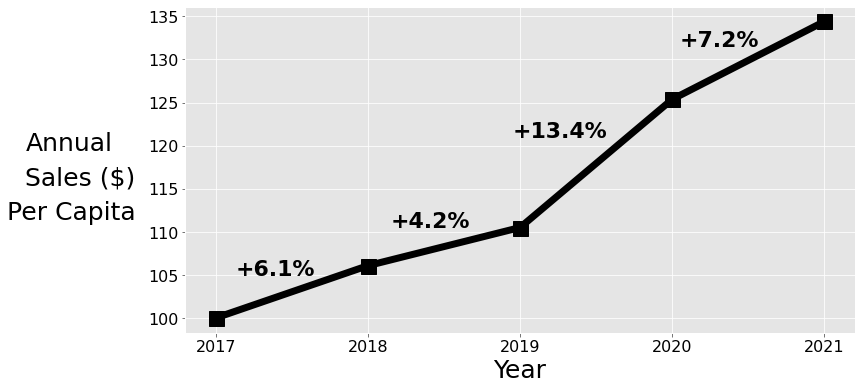

In [119]:
# is the growth due to increases in population?
# Would be better if I used population of adults > 21 years old
fig = plt.figure(figsize = (12,6))
plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.groupby(['Year']).agg({'Sale_Dollars':'sum'})['Sale_Dollars']/[3143734,3149900,3159596,3163561,3185239], 
        color='black', marker='s', linewidth=7, markersize=15)

plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xticks(fontsize=16, color = 'black')
plt.xlabel('Year', fontsize=25, color = 'black', rotation = 0)

plt.text(2015.75,119.5,'Annual',ha = 'left',
         fontsize=25,color='black',
         rotation=0)
plt.text(2015.75,115.5,'Sales ($)',ha = 'left',
         fontsize=25,color='black',
         rotation=0)
plt.text(2015.63,111.5,'Per Capita',ha = 'left',
         fontsize=25,color='black',
         rotation=0)

plt.yticks(fontsize=16, color = 'black')

plt.text(2017.13,105,'+6.1%',ha = 'left',
         fontsize=22,color='black',fontweight = 'bold',
         rotation=0)
plt.text(2018.15,110.5,'+4.2%',ha = 'left',
         fontsize=22,color='black',fontweight = 'bold',
         rotation=0)
plt.text(2018.95,121,'+13.4%',ha = 'left',
         fontsize=22,color='black',fontweight = 'bold',
         rotation=0)
plt.text(2020.05,131.5,'+7.2%',ha = 'left',
         fontsize=22,color='black',fontweight = 'bold',
         rotation=0)

plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))

#fig.patch.set_facecolor('#a2c4c9ff')

# II. Data Visualizations - Store Type

### a. Store COUNTS By Store Type

In [21]:
temp[temp['Year']==2021].groupby(['StoreType']).agg({'StoreID':'nunique'}).sort_values('StoreID', ascending = False)

,StoreID
StoreType,
Food & Grocery,986
Convenience,589
"Liquor, Spirits & Wine",144
Drugstore,95
Dept. Store,94
Distillery/Bar/Restaurant,20
Unknown,11
Hotel/Casino,9


In [22]:
clrs_storecount = list(reversed(['red',
        '#F7D027',
        '#378805',
        '#ec82aa',
        'navy',
        '#9a1fe8']))

Text(0.5, 0, 'Store Count')

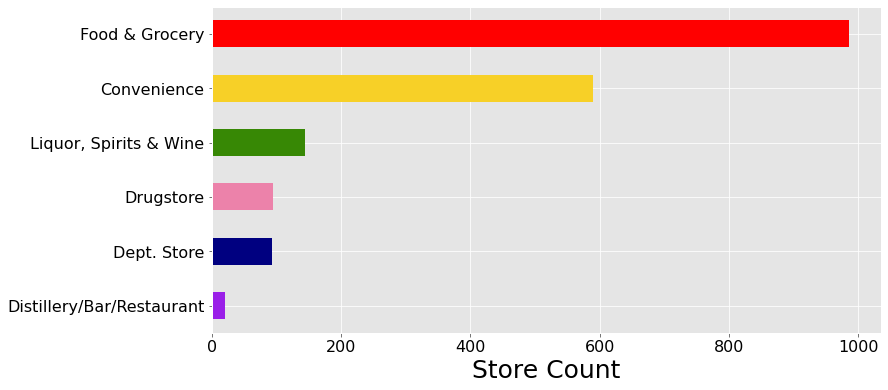

In [23]:
fig = plt.figure(figsize = (12,6))
temp[(temp['Year']==2021)&((temp['StoreType']!='Unknown')&((temp['StoreType']!='Hotel/Casino')))].groupby(['StoreType'])['StoreID'].nunique().sort_values(ascending = True).plot.barh(color=clrs_storecount)
plt.ylabel('', fontsize=16, color = 'black', rotation = 90)
plt.legend('',frameon=False)

#fig.patch.set_facecolor('#a2c4c9ff')

plt.yticks(fontsize=16, color = 'black')
plt.xticks(fontsize=16, color = 'black')

plt.xlabel('Store Count', fontsize=25, color = 'black', rotation = 0)

In [24]:
temp.groupby(['Year','StoreType']).agg({'StoreID':'nunique'}).sort_values(by ='StoreID')

,,StoreID
Year,StoreType,
2021,Hotel/Casino,9
2017,Hotel/Casino,9
2019,Hotel/Casino,10
2018,Hotel/Casino,10
2020,Hotel/Casino,10
2021,Unknown,11
2019,Distillery/Bar/Restaurant,19
2021,Distillery/Bar/Restaurant,20
2020,Unknown,20


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

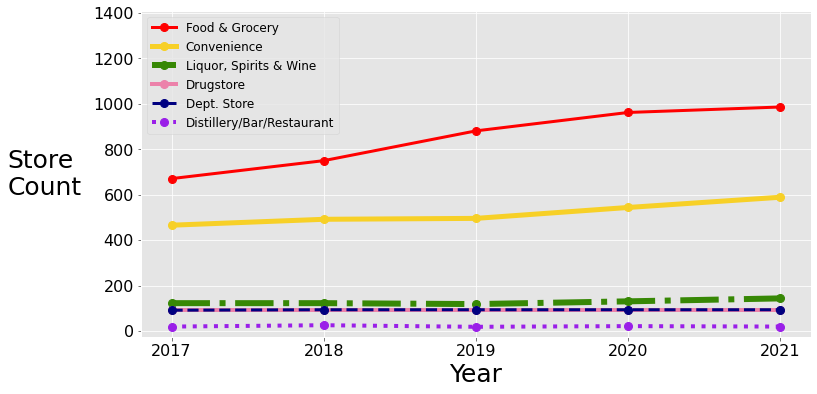

In [25]:
fig = plt.figure(figsize = (12,6))

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Food & Grocery'].groupby('Year').agg({'StoreID':'nunique'}), 
        color='red', marker='o', linewidth=3, markersize=8, 
         label = 'Food & Grocery')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Convenience'].groupby('Year').agg({'StoreID':'nunique'}), 
        color='#F7D027', marker='o', linewidth=5, markersize=8, 
         label = 'Convenience')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Liquor, Spirits & Wine'].groupby('Year').agg({'StoreID':'nunique'}), 
        color='#378805', marker='o', linestyle='dashdot', linewidth=6, markersize=8, 
         label = 'Liquor, Spirits & Wine')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Drugstore'].groupby('Year').agg({'StoreID':'nunique'}), 
        color='#ec82aa', marker='o', linewidth=4, markersize=8, 
         label = 'Drugstore')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Dept. Store'].groupby('Year').agg({'StoreID':'nunique'}), 
        color='navy', marker='o', linestyle = 'dashed', linewidth=3, markersize=8, 
         label = 'Dept. Store')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Distillery/Bar/Restaurant'].groupby('Year').agg({'StoreID':'nunique'}), 
        color='#9a1fe8', marker='o', linestyle='dotted',linewidth=4, markersize=8, 
         label = 'Distillery/Bar/Restaurant')

plt.legend(loc='best')
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xticks(fontsize=16, color = 'black')
plt.xlabel('Year', fontsize=25, color = 'black', rotation = 0)

plt.text(2015.92,720,'Store',ha = 'left',
         fontsize=25,color='black',
         rotation=0)
plt.text(2015.92,600,'Count',ha = 'left',
         fontsize=25,color='black',
         rotation=0)

plt.ylim(-25,1410)
plt.yticks(fontsize=16, color = 'black')

#fig.patch.set_facecolor('#a2c4c9ff')

### b. SALES By Store Type

In [26]:
type_sales = temp[(temp['Year']==2021)&((temp['StoreType']!='Unknown')&((temp['StoreType']!='Hotel/Casino')))].groupby(['StoreType'])['Sale_Dollars'].sum().sort_values(ascending = True)
type_sales_df = type_sales.to_frame().sort_values('StoreType')
type_sales_df

,Sale_Dollars
StoreType,
Convenience,6.510767e+07
Dept. Store,6.082060e+07
Distillery/Bar/Restaurant,2.796684e+06
Drugstore,3.632045e+06
Food & Grocery,2.195429e+08
"Liquor, Spirits & Wine",7.066220e+07


In [27]:
clrs = list(reversed(['red',
                      '#378805',
        '#F7D027',
        'navy',
        '#ec82aa',
        '#9a1fe8']))

Text(0.5, 0, 'Total Annual Sales (Dollars)')

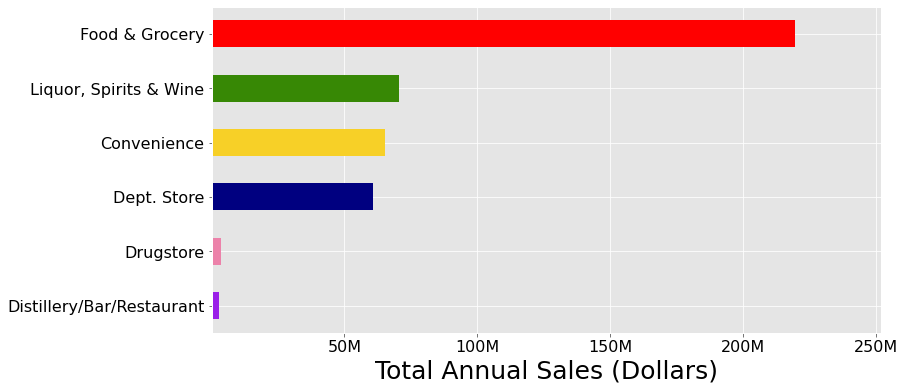

In [102]:
fig = plt.figure(figsize = (12,6))
temp[(temp['Year']==2021)&((temp['StoreType']!='Unknown')&((temp['StoreType']!='Hotel/Casino')))].groupby(['StoreType'])['Sale_Dollars'].sum().sort_values(ascending = True).plot.barh(color=clrs)
plt.xlabel('Store Count',fontsize=16, color = 'black')
plt.ylabel('', fontsize=16, color = 'black', rotation = 90)
plt.legend('',frameon=False)

#fig.patch.set_facecolor('#a2c4c9ff')

positions = (50e6, 100e6, 150e6, 200e6, 250e6)
labels = ("50M", "100M", "150M", "200M", "250M")
plt.xticks(positions, labels, fontsize=16, color = 'black')
plt.xlim(0,2.52e8)

plt.yticks(fontsize=16, color = 'black')

plt.xlabel('Total Annual Sales (Dollars)', fontsize=25, color = 'black', rotation = 0)

(array([-5.0e+07,  0.0e+00,  5.0e+07,  1.0e+08,  1.5e+08,  2.0e+08,
         2.5e+08,  3.0e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

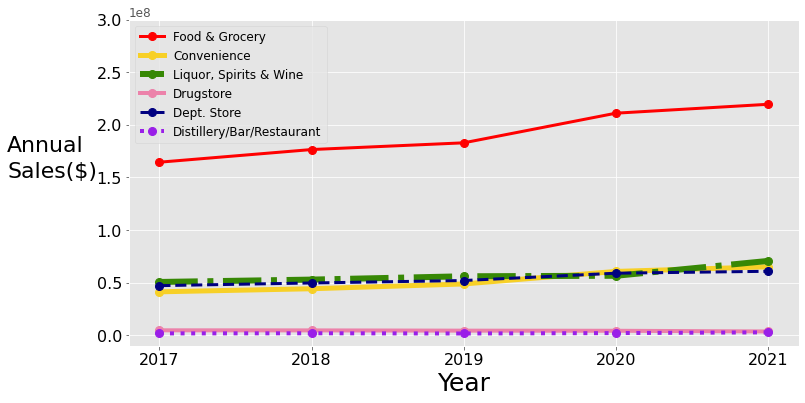

In [29]:
fig = plt.figure(figsize = (12,6))

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Food & Grocery'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='red', marker='o', linewidth=3, markersize=8, 
         label = 'Food & Grocery')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Convenience'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='#F7D027', marker='o', linewidth=5, markersize=8, 
         label = 'Convenience')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Liquor, Spirits & Wine'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='#378805', marker='o', linestyle='dashdot', linewidth=6, markersize=8, 
         label = 'Liquor, Spirits & Wine')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Drugstore'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='#ec82aa', marker='o', linewidth=4, markersize=8, 
         label = 'Drugstore')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Dept. Store'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='navy', marker='o', linestyle = 'dashed', linewidth=3, markersize=8, 
         label = 'Dept. Store')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['StoreType'] == 'Distillery/Bar/Restaurant'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='#9a1fe8', marker='o', linestyle='dotted', linewidth=4, markersize=8, 
         label = 'Distillery/Bar/Restaurant')

plt.legend()
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xticks(fontsize=16, color = 'black')
plt.xlabel('Year', fontsize=25, color = 'black', rotation = 0)

plt.text(2016,1.25e8+0.5e8,'Annual',ha = 'left',
         fontsize=22,color='black',
         rotation=0)
plt.text(2016,1e8+0.5e8,'Sales($)',ha = 'left',
         fontsize=22,color='black',
         rotation=0)

plt.ylim(-0.1e8,3e8)
plt.yticks(fontsize=16, color = 'black')

#fig.patch.set_facecolor('#c9daf8ff')

### c. Annual Sales By StoreType

In [82]:
df_store_food = temp[(temp['Year']==2021)&(temp['StoreType']=='Food & Grocery')].groupby(['StoreID']).agg({'Sale_Dollars':'sum'})
df_store_convenience = temp[(temp['Year']==2021)&(temp['StoreType']=='Convenience')].groupby(['StoreID']).agg({'Sale_Dollars':'sum'})
df_store_liquor = temp[(temp['Year']==2021)&(temp['StoreType']=='Liquor, Spirits & Wine')].groupby(['StoreID']).agg({'Sale_Dollars':'sum'})
df_store_drugstore = temp[(temp['Year']==2021)&(temp['StoreType']=='Drugstore')].groupby(['StoreID']).agg({'Sale_Dollars':'sum'})
df_store_deptstore = temp[(temp['Year']==2021)&(temp['StoreType']=='Dept. Store')].groupby(['StoreID']).agg({'Sale_Dollars':'sum'})
df_store_distillery = temp[(temp['Year']==2021)&(temp['StoreType']=='Distillery/Bar/Restaurant')].groupby(['StoreID']).agg({'Sale_Dollars':'sum'})

In [83]:
df_store_food.rename(columns = {'Sale_Dollars':'Annual_Sales_food'}, inplace = True)
df_store_convenience.rename(columns = {'Sale_Dollars':'Annual_Sales_convenience'}, inplace = True)
df_store_liquor.rename(columns = {'Sale_Dollars':'Annual_Sales_liquor'}, inplace = True)
df_store_drugstore.rename(columns = {'Sale_Dollars':'Annual_Sales_drugstore'}, inplace = True)
df_store_deptstore.rename(columns = {'Sale_Dollars':'Annual_Sales_deptstore'}, inplace = True)
df_store_distillery.rename(columns = {'Sale_Dollars':'Annual_Sales_distillery'}, inplace = True)

In [84]:
columns = [df_store_drugstore['Annual_Sales_drugstore'],
           df_store_convenience['Annual_Sales_convenience'],
           df_store_distillery['Annual_Sales_distillery'],
           df_store_food['Annual_Sales_food'],
           df_store_liquor['Annual_Sales_liquor'],
           df_store_deptstore['Annual_Sales_deptstore']]

In [85]:
temp[temp['Year']==2021].groupby(['StoreType']).agg({'StoreID':'nunique'}).sort_values('StoreID', ascending = False)

,StoreID
StoreType,
Food & Grocery,986
Convenience,589
"Liquor, Spirits & Wine",144
Drugstore,95
Dept. Store,94
Distillery/Bar/Restaurant,20
Unknown,11
Hotel/Casino,9


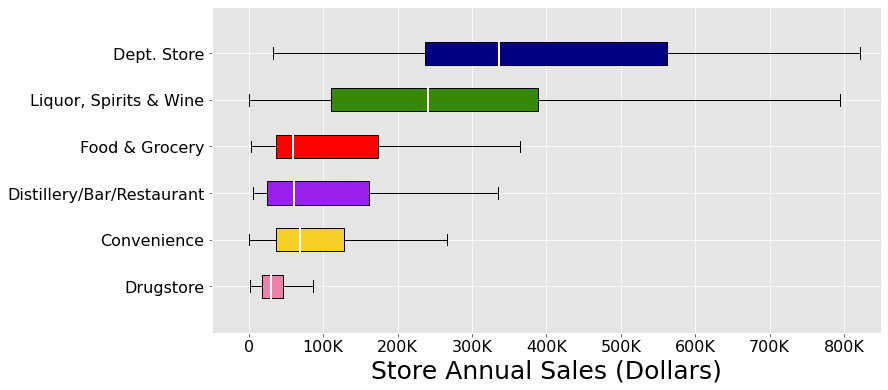

In [88]:
fig, ax = plt.subplots(figsize = (12,6))
box = ax.boxplot(columns,vert = False,
           patch_artist=True,
           showfliers=False) # NOT showing outliers

positions = (1,2,3,4,5,6)
labels = ("Drugstore","Convenience","Distillery/Bar/Restaurant","Food & Grocery","Liquor, Spirits & Wine","Dept. Store")
plt.yticks(positions, labels, fontsize=16, color = 'black', rotation=0)
plt.ylim(0,7)

xpositions = (0,100000,200000,300000,400000,500000,600000,700000,800000)
xlabels = ("0","100K", "200K", "300K","400K","500K", "600K","700K", "800K")
plt.xticks(xpositions, xlabels, fontsize=16, color = 'black', rotation=0)
plt.xlim(-50000,850000)

plt.xlabel('Store Annual Sales (Dollars)',fontsize=25, color = 'black')

colors = ['#ec82aa', '#F7D027', '#9a1fe8', 'red', '#378805', 'navy']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
for median in box['medians']:
    median.set_color('white')
    median.set_linewidth(2)
    
plt.show()

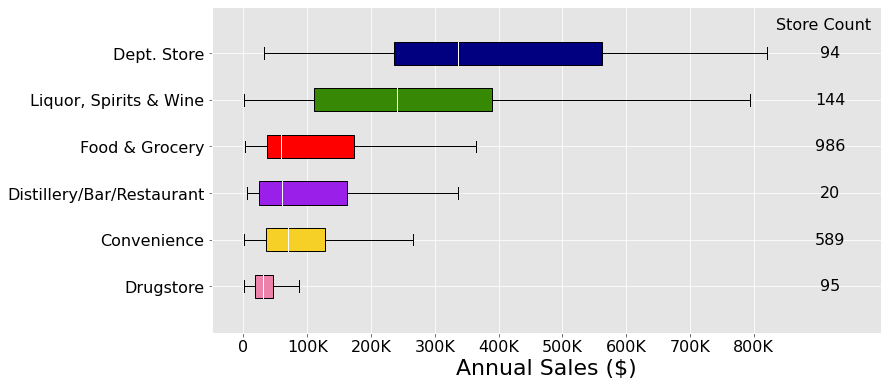

In [35]:
# Same plot, but with store count on plot (too crowded, not using)
fig, ax = plt.subplots(figsize = (12,6))
box = ax.boxplot(columns,vert = False,
           patch_artist=True,
           showfliers=False) # NOT showing outliers

positions = (1,2,3,4,5,6)
labels = ("Drugstore","Convenience","Distillery/Bar/Restaurant","Food & Grocery","Liquor, Spirits & Wine","Dept. Store")
plt.yticks(positions, labels, fontsize=16, color = 'black', rotation=0)
plt.ylim(0,7)

xpositions = (0,100000,200000,300000,400000,500000,600000,700000,800000)
xlabels = ("0","100K", "200K", "300K","400K","500K", "600K","700K", "800K")
plt.xticks(xpositions, xlabels, fontsize=16, color = 'black', rotation=0)
plt.xlim(-50000,1000000)

plt.xlabel('Annual Sales ($)',fontsize=22, color = 'black')

colors = ['#ec82aa', '#F7D027', '#9a1fe8', 'red', '#378805', 'navy']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
for median in box['medians']:
    median.set_color('white')
    median.set_linewidth(1)
    
plt.text(835000,6.51,'Store Count',ha = 'left',
         fontsize=16,color='black',
         rotation=0)
plt.text(920000,6,'94', ha = 'center', va = 'center', fontsize=16,color='black',rotation=0)
plt.text(920000,5,'144', ha = 'center', va = 'center', fontsize=16,color='black',rotation=0)
plt.text(920000,4,'986', ha = 'center', va = 'center', fontsize=16,color='black',rotation=0)
plt.text(920000,3,'20', ha = 'center', va = 'center', fontsize=16,color='black',rotation=0)
plt.text(920000,2,'589', ha = 'center', va = 'center', fontsize=16,color='black',rotation=0)
plt.text(920000,1,'95', ha = 'center', va = 'center', fontsize=16,color='black',rotation=0)

plt.show()

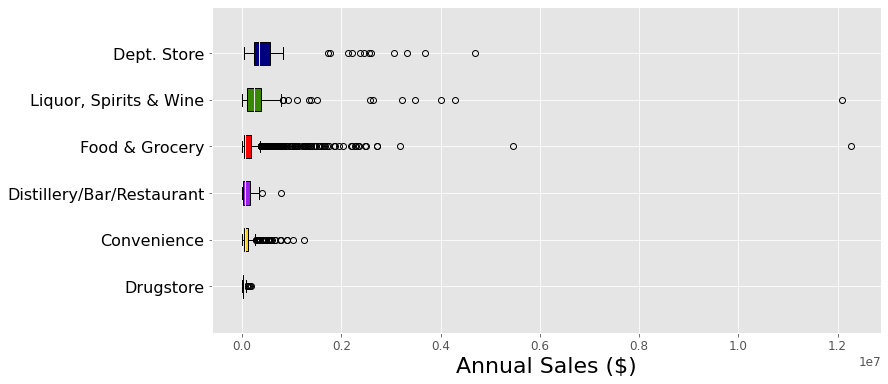

In [36]:
# Showing Outliers
fig, ax = plt.subplots(figsize = (12,6))
box = ax.boxplot(columns,vert = False,
           patch_artist=True)

positions = (1,2,3,4,5,6)
labels = ("Drugstore","Convenience","Distillery/Bar/Restaurant","Food & Grocery","Liquor, Spirits & Wine","Dept. Store")
plt.yticks(positions, labels, fontsize=16, color = 'black', rotation=0)
plt.ylim(0,7)

plt.xlabel('Annual Sales ($)',fontsize=22, color = 'black')

colors = ['#ec82aa', '#F7D027', '#9a1fe8', 'red', '#378805', 'navy']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
for median in box['medians']:
    median.set_color('#e8e7e6')
    median.set_linewidth(1)
    
plt.show()

# III. Data Visualizations - Product Category

In [37]:
temp[temp['Year']==2021].groupby(['CategoryGroup']).agg({'Sale_Dollars':'sum'}).sort_values(by ='Sale_Dollars').nlargest(20, 'Sale_Dollars').sort_values(by ='Sale_Dollars')

,Sale_Dollars
CategoryGroup,
spirit,5.993690e+06
cocktail,8.701880e+06
gin,9.746487e+06
schnapps,1.090899e+07
other,1.224169e+07
brandy,2.123271e+07
liqueur,2.966306e+07
tequila,3.507131e+07
rum,4.111186e+07


In [117]:
clrs_products = list(reversed(['#a43e06', 'blue', '#f67300', 'magenta','#72b41a','#ffff00','#07f702','#800080']))

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'gin'),
  Text(0, 1, 'schnapps'),
  Text(0, 2, 'brandy'),
  Text(0, 3, 'liqueur'),
  Text(0, 4, 'tequila'),
  Text(0, 5, 'rum'),
  Text(0, 6, 'vodka'),
  Text(0, 7, 'whisky')])

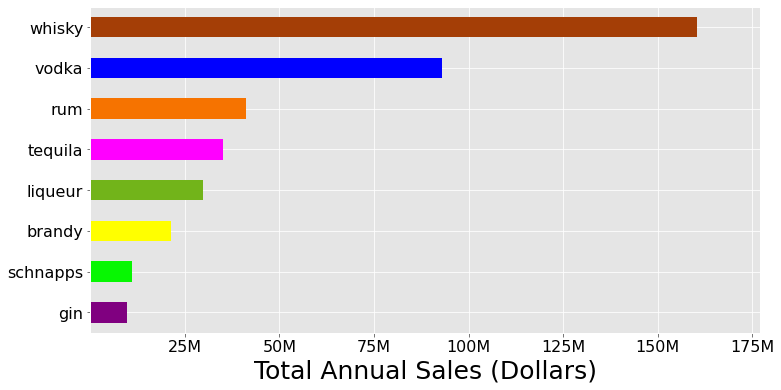

In [118]:
fig = plt.figure(figsize = (12,6))
temp[(temp['Year']==2021)&(temp['CategoryGroup']!='other')].groupby(['CategoryGroup'])['Sale_Dollars'].sum().nlargest(8).sort_values(ascending = True).plot.barh(color=clrs_products)

plt.xlabel('Total Annual Sales (Dollars)',fontsize=25, color = 'black')
plt.ylabel('', fontsize=16, color = 'black', rotation = 90)
plt.legend('',frameon=False)

#fig.patch.set_facecolor('#a2c4c9ff')

positions = (25e6, 50e6, 75e6, 100e6, 125e6, 150e6, 175e6)
labels = ("25M", "50M", "75M", "100M", "125M","150M", "175M")
plt.xticks(positions, labels, fontsize=16, color = 'black')
plt.xlim(0,1.77e8)

plt.yticks(fontsize=16, color = 'black')


Text(2015.75, 88000000.0, 'Sales ($)')

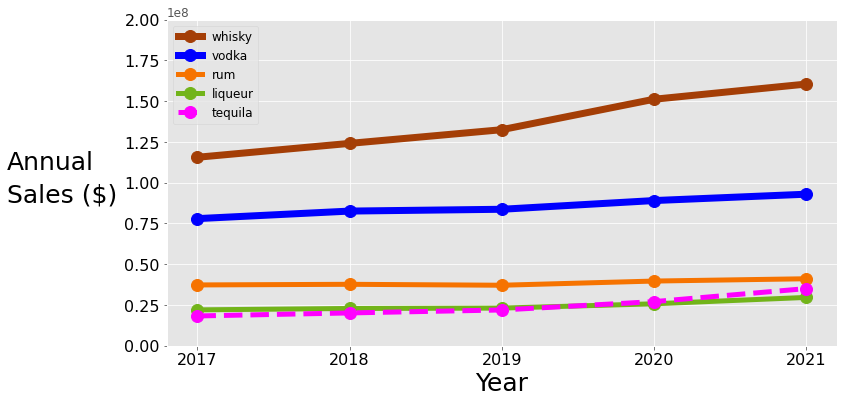

In [52]:
from matplotlib.patches import Rectangle

fig = plt.figure(figsize = (12,6))

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['CategoryGroup'] == 'whisky'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='#a43e06', marker='o', linewidth=7, markersize=12, 
         label = 'whisky')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['CategoryGroup'] == 'vodka'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='blue', marker='o', linewidth=7, markersize=12, 
         label = 'vodka')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['CategoryGroup'] == 'rum'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='#f67300', marker='o', linewidth=5, markersize=12, 
         label = 'rum')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['CategoryGroup'] == 'liqueur'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='#72b41a', marker='o', linewidth=5, markersize=12, 
         label = 'liqueur')

plt.plot([2017, 2018, 2019, 2020, 2021],
         temp.loc[temp['CategoryGroup'] == 'tequila'].groupby('Year').agg({'Sale_Dollars':'sum'}), 
        color='magenta', marker='o', linestyle="dashed", linewidth=5, markersize=12, 
         label = 'tequila')

plt.legend()

plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xticks(fontsize=16, color = 'black')
plt.xlabel('Year', fontsize=25, color = 'black', rotation = 0)

plt.ylim(0,2e8)
plt.yticks(fontsize=16, color = 'black')

plt.text(2015.75,1.08e8,'Annual',ha = 'left',
         fontsize=25,color='black',
         rotation=0)
plt.text(2015.75,0.88e8,'Sales ($)',ha = 'left',
         fontsize=25,color='black',
         rotation=0)

# fig.patch.set_facecolor('#a2c4c9ff')

In [42]:
temp['CategoryGroup'].unique()

array(['whisky', 'liqueur', 'tequila', 'vodka', 'rum', 'other',
       'schnapps', 'gin', 'brandy', 'cocktail', 'spirit'], dtype=object)

In [43]:
# Create subset dataframes
df_whisky = temp[(temp['Year']==2021)&(temp['CategoryGroup']=='whisky')]
df_vodka = temp[(temp['Year']==2021)&(temp['CategoryGroup']=='vodka')]
df_rum = temp[(temp['Year']==2021)&(temp['CategoryGroup']=='rum')]
df_liqueur = temp[(temp['Year']==2021)&(temp['CategoryGroup']=='liqueur')]
df_tequila = temp[(temp['Year']==2021)&(temp['CategoryGroup']=='tequila')]
df_gin = temp[(temp['Year']==2021)&(temp['CategoryGroup']=='gin')]
df_brandy = temp[(temp['Year']==2021)&(temp['CategoryGroup']=='brandy')]
df_schnapps = temp[(temp['Year']==2021)&(temp['CategoryGroup']=='schnapps')]

## Bottle Volumes for each Category

In [45]:
# Bottle Volume 
vol_list_whisky = []
cnt_whisky = 0
for vol in df_whisky['Sale_BottleVolume_ml']:
    num_bottles = df_whisky.iloc[cnt_whisky,5] # Bottles Sold
    vol_list_whisky.extend([vol]*num_bottles)        
    cnt_whisky +=1
    
vol_list_vodka = []
cnt_vodka = 0
for vol in df_vodka['Sale_BottleVolume_ml']:
    num_bottles = df_vodka.iloc[cnt_vodka,5] # Bottles Sold
    vol_list_vodka.extend([vol]*num_bottles)        
    cnt_vodka +=1

vol_list_rum = []
cnt_rum = 0
for vol in df_rum['Sale_BottleVolume_ml']:
    num_bottles = df_rum.iloc[cnt_rum,5] # Bottles Sold
    vol_list_rum.extend([vol]*num_bottles)        
    cnt_rum +=1
    
vol_list_liqueur = []
cnt_liqueur = 0
for vol in df_liqueur['Sale_BottleVolume_ml']:
    num_bottles = df_liqueur.iloc[cnt_liqueur,5] # Bottles Sold
    vol_list_liqueur.extend([vol]*num_bottles)        
    cnt_liqueur +=1
    
vol_list_tequila = []
cnt_tequila = 0
for vol in df_tequila['Sale_BottleVolume_ml']:
    num_bottles = df_tequila.iloc[cnt_tequila,5] # Bottles Sold
    vol_list_tequila.extend([vol]*num_bottles)        
    cnt_tequila +=1
    
vol_list_gin = []
cnt_gin = 0
for vol in df_gin['Sale_BottleVolume_ml']:
    num_bottles = df_gin.iloc[cnt_gin,5] # Bottles Sold
    vol_list_gin.extend([vol]*num_bottles)        
    cnt_gin +=1

vol_list_brandy = []
cnt_brandy = 0
for vol in df_brandy['Sale_BottleVolume_ml']:
    num_bottles = df_brandy.iloc[cnt_brandy,5] # Bottles Sold
    vol_list_brandy.extend([vol]*num_bottles)        
    cnt_brandy +=1
    
vol_list_schnapps = []
cnt_schnapps = 0
for vol in df_schnapps['Sale_BottleVolume_ml']:
    num_bottles = df_schnapps.iloc[cnt_schnapps,5] # Bottles Sold
    vol_list_schnapps.extend([vol]*num_bottles)        
    cnt_schnapps +=1

In [46]:
print('whisky bottle sizes: ', np.unique(vol_list_whisky))
print('vodka bottle sizes: ', np.unique(vol_list_vodka))
print('rum bottle sizes: ', np.unique(vol_list_rum))
print('liqueur bottle sizes: ', np.unique(vol_list_liqueur))
print('tequila bottle sizes: ', np.unique(vol_list_tequila))
print('gin bottle sizes: ', np.unique(vol_list_gin))
print('brandy bottle sizes: ', np.unique(vol_list_brandy))
print('schnapps bottle sizes: ', np.unique(vol_list_schnapps))

whisky bottle sizes:  [  50.  100.  200.  375.  600.  750.  800. 1000. 1750. 2250. 3500.]
vodka bottle sizes:  [  50.  100.  200.  375.  750. 1000. 1750.]
rum bottle sizes:  [  50.  200.  375.  750. 1000. 1750.]
liqueur bottle sizes:  [  20.   50.  100.  200.  375.  750. 1000. 1750. 2400.]
tequila bottle sizes:  [  50.  100.  200.  375.  750. 1000. 1750.]
gin bottle sizes:  [  50.  100.  200.  375.  750. 1000. 1750.]
brandy bottle sizes:  [  50.  100.  200.  375.  750. 1000. 1200. 1750.]
schnapps bottle sizes:  [  50.  100.  200.  375.  400.  750. 1000. 1750.]


Text(0, 0.5, 'Number of Bottles Purchased')

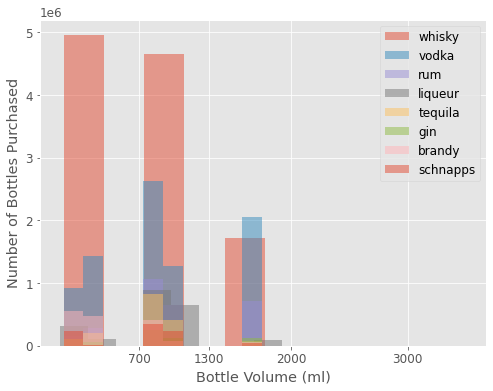

In [47]:
plt.figure(figsize=(8,6))
plt.hist(vol_list_whisky, histtype='bar', alpha=0.5, label="whisky")
plt.hist(vol_list_vodka, histtype='bar', alpha=0.5, label="vodka")
plt.hist(vol_list_rum, histtype='bar', alpha=0.5, label="rum")
plt.hist(vol_list_liqueur, histtype='bar', alpha=0.5, label="liqueur")
plt.hist(vol_list_tequila, histtype='bar', alpha=0.5, label="tequila")
plt.hist(vol_list_gin, histtype='bar', alpha=0.5, label="gin")
plt.hist(vol_list_brandy, histtype='bar', alpha=0.5, label="brandy")
plt.hist(vol_list_schnapps, histtype='bar', alpha=0.5, label="schnapps")

plt.legend(loc='upper right')
plt.xticks([700, 1300, 2000, 3000])
plt.xlabel('Bottle Volume (ml)')
plt.ylabel('Number of Bottles Purchased')

## Bottle Price for Medium Bottle Size

In [48]:
# Create subset dataframes
df_whisky_med = temp[(temp['Year']==2021)&(temp['CategoryGroup']=='whisky')&((temp['Sale_BottleVolume_ml']>700)&(temp['Sale_BottleVolume_ml']<1300))]
df_vodka_med = temp[(temp['Year']==2021)&(temp['CategoryGroup']=='vodka')&((temp['Sale_BottleVolume_ml']>700)&(temp['Sale_BottleVolume_ml']<1300))]
df_rum_med = temp[(temp['Year']==2021)&(temp['CategoryGroup']=='rum')&((temp['Sale_BottleVolume_ml']>700)&(temp['Sale_BottleVolume_ml']<1300))]
df_liqueur_med = temp[(temp['Year']==2021)&(temp['CategoryGroup']=='liqueur')&((temp['Sale_BottleVolume_ml']>700)&(temp['Sale_BottleVolume_ml']<1300))]
df_tequila_med = temp[(temp['Year']==2021)&(temp['CategoryGroup']=='tequila')&((temp['Sale_BottleVolume_ml']>700)&(temp['Sale_BottleVolume_ml']<1300))]
df_gin_med = temp[(temp['Year']==2021)&(temp['CategoryGroup']=='gin')&((temp['Sale_BottleVolume_ml']>700)&(temp['Sale_BottleVolume_ml']<1300))]
df_brandy_med = temp[(temp['Year']==2021)&(temp['CategoryGroup']=='brandy')&((temp['Sale_BottleVolume_ml']>700)&(temp['Sale_BottleVolume_ml']<1300))]
df_schnapps_med = temp[(temp['Year']==2021)&(temp['CategoryGroup']=='schnapps')&((temp['Sale_BottleVolume_ml']>700)&(temp['Sale_BottleVolume_ml']<1300))]

In [49]:
# Bottle Price
price_list_whisky = []
cnt_whisky = 0
for price in df_whisky_med['Price_StateBottleRetail']:
    num_bottles = df_whisky_med.iloc[cnt_whisky,5] # Bottles Sold
    price_list_whisky.extend([price]*num_bottles)        
    cnt_whisky +=1
    
price_list_vodka = []
cnt_vodka = 0
for price in df_vodka_med['Price_StateBottleRetail']:
    num_bottles = df_vodka_med.iloc[cnt_vodka,5] # Bottles Sold
    price_list_vodka.extend([price]*num_bottles)        
    cnt_vodka +=1

price_list_rum = []
cnt_rum = 0
for price in df_rum_med['Price_StateBottleRetail']:
    num_bottles = df_rum_med.iloc[cnt_rum,5] # Bottles Sold
    price_list_rum.extend([price]*num_bottles)        
    cnt_rum +=1
    
price_list_liqueur = []
cnt_liqueur = 0
for price in df_liqueur_med['Price_StateBottleRetail']:
    num_bottles = df_liqueur_med.iloc[cnt_liqueur,5] # Bottles Sold
    price_list_liqueur.extend([price]*num_bottles)        
    cnt_liqueur +=1
    
price_list_tequila = []
cnt_tequila = 0
for price in df_tequila_med['Price_StateBottleRetail']:
    num_bottles = df_tequila_med.iloc[cnt_tequila,5] # Bottles Sold
    price_list_tequila.extend([price]*num_bottles)        
    cnt_tequila +=1
    
price_list_gin = []
cnt_gin = 0
for price in df_gin_med['Price_StateBottleRetail']:
    num_bottles = df_gin_med.iloc[cnt_gin,5] # Bottles Sold
    price_list_gin.extend([price]*num_bottles)        
    cnt_gin +=1
    
price_list_brandy = []
cnt_brandy = 0
for price in df_brandy_med['Price_StateBottleRetail']:
    num_bottles = df_brandy_med.iloc[cnt_brandy,5] # Bottles Sold
    price_list_brandy.extend([price]*num_bottles)        
    cnt_brandy +=1
    
price_list_schnapps = []
cnt_schnapps = 0
for price in df_schnapps_med['Price_StateBottleRetail']:
    num_bottles = df_schnapps_med.iloc[cnt_schnapps,5] # Bottles Sold
    price_list_schnapps.extend([price]*num_bottles)        
    cnt_schnapps +=1

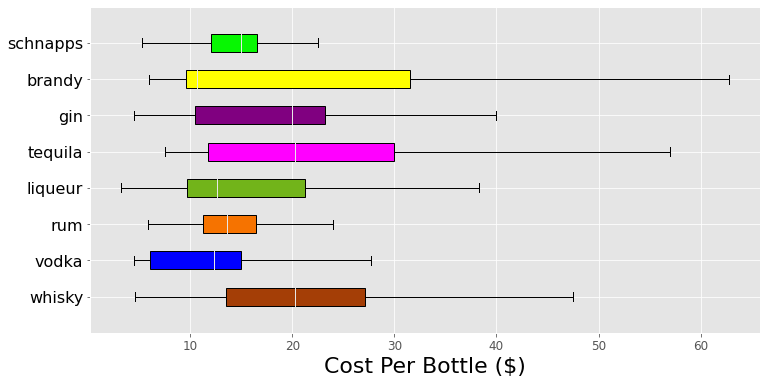

In [50]:
columns = [price_list_whisky, price_list_vodka, price_list_rum, price_list_liqueur, price_list_tequila, price_list_gin, price_list_brandy, price_list_schnapps]
fig, ax = plt.subplots(figsize = (12,6))
box = ax.boxplot(columns,vert = False,
           patch_artist=True,
           showfliers=False) # NOT showing outliers

positions = (1,2,3,4,5,6,7,8)
labels = ("whisky","vodka","rum","liqueur","tequila","gin","brandy","schnapps")
plt.yticks(positions, labels, fontsize=16, color = 'black', rotation=0)
plt.ylim(0,9)

plt.xlabel('Cost Per Bottle ($)',fontsize=22, color = 'black')

colors = ['#a43e06', 'blue', '#f67300', '#72b41a', 'magenta', '#800080', '#ffff00', '#07f702']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
for median in box['medians']:
    median.set_color('#e8e7e6')
    median.set_linewidth(1)
    
plt.show()

In [120]:
# all pretty comparable, or at least nothing stands out as "more expensive"

In [121]:
# sanity check on graph
np.median(price_list_whisky)

20.25